# Augmented Data functions build  
Author: Jennifer Yoon
Date: July 6, 2025, 12:30 pm start  

## 1. Read Data, Plot, Analyze    
Read-in one sample .mat data  
Plot original data  
July 6, 2025  
 -- 12:40 pm start time  
 -- 3:40 pm, done step 1      

## 2. Do Augmentation function, plot each time  

### 2A. Chest Augmnetation functions  
 -- 4:15 pm start time



### 2B. Powerline 50hz, 60 hz  



### 2C. Intermittent drop-out, spike buzz  



### 2D. Assemble combinations of augmentations  


### 2E. Build batch script  

Batch process whole folder path, output to different path  

------------

## 3. Run 1D_CNN on Augmented Dataset

### 3A. Peak center split, with augmented dataset

### 3B. Run 1DCNN with augmented data

In [3]:
# Mount Google Drive to Colab instance
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Imports, short list for now

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.io
import os

#import math
#import time


### 1: Read-in Data, Plots Analysis

In [16]:
# Upload data files, print directory content on Colab
!ls

# Read .mat file, 125 hertz, millivolts (downsampled)
filename = "HR00001.mat"

# Load the .mat file
mat_data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
print(mat_data, type(mat_data))

# Check the keys in the loaded data
print(mat_data.keys())  # only one key, 'val'.

# Access the struct (assuming the variable is named 'myStruct')
data = mat_data['val']

# Show elements of data (ndarray type)
print('last 6 elements Vs: \n', data[-6:])
print('length of row 0:', len(data[0]))

drive	     HR00001.mat  HR00002.mat  vscode_plot.png
HR00001.hea  HR00002.hea  sample_data
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jun 26 18:46:44 2025', '__version__': '1.0', '__globals__': [], 'val': array([[-0.115, -0.115, -0.109, ...,  0.21 ,  0.21 ,  0.21 ],
       [-0.05 , -0.05 , -0.048, ...,  0.205,  0.205,  0.205],
       [ 0.065,  0.065,  0.061, ..., -0.005, -0.005, -0.005],
       ...,
       [-0.035, -0.035, -0.03 , ...,  0.185,  0.185,  0.185],
       [-0.035, -0.035, -0.029, ...,  0.17 ,  0.17 ,  0.17 ],
       [-0.075, -0.075, -0.069, ...,  0.18 ,  0.18 ,  0.18 ]])} <class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'val'])
last 6 elements Vs: 
 [[-0.065 -0.065 -0.059 ...  0.075  0.075  0.075]
 [-0.04  -0.04  -0.035 ...  0.225  0.225  0.225]
 [-0.005 -0.005 -0.005 ...  0.175  0.175  0.175]
 [-0.035 -0.035 -0.03  ...  0.185  0.185  0.185]
 [-0.035 -0.035 -0.029 ...  0.17   0.17   0.17 ]
 [-0.075 -0.075 -0.069 ...  0.18   0.

In [ ]:
# Plot all 12 signals
plt.figure(figsize=(12, 8))

for i in range(num):
    plt.plot(time_downsampled, downsampled_data[i] + i * 5, label=ecg_labels[i])
    # Offset each signal for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Downsampled Signals (125 Hz)")
plt.legend()
plt.show()

In [18]:
# leadeslist. ecg data is always in this lead order.
leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF',
         'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

[0, 1, 10, 11]


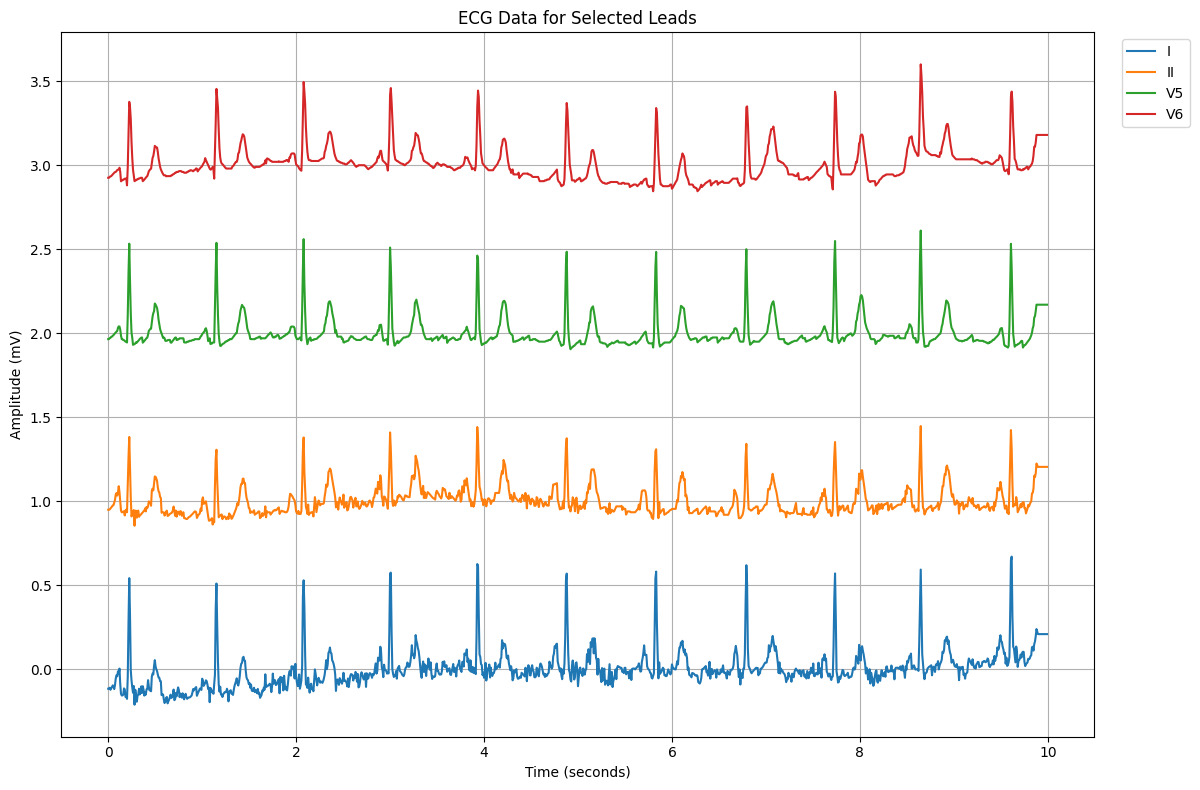

In [57]:
# Assuming 'data' is your 12x1250 numpy array from the .mat file
# Assuming 'leads' is your list of lead names in the correct order

leads_plot = ['I', 'II', 'V5', 'V6'] # Example list of leads to plot

# Get the indices of the leads to plot
indices_to_plot = [leads.index(lead) for lead in leads_plot]
print(indices_to_plot)

# Select the data for the chosen leads
data_to_plot = data[indices_to_plot, :]

# Create a time vector (assuming 125 Hz sampling frequency)
sampling_frequency = 125  # Hz
time = np.arange(data_to_plot.shape[1]) / sampling_frequency

# Plot the selected signals
plt.figure(figsize=(12, 8))

for i, index in enumerate(indices_to_plot):
    plt.plot(time, data_to_plot[i] + i * 1, label=leads[index]) # Offset for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Data for Selected Leads")
# legend location edit
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_I_II_V5_V6.png')
plt.show()

[6, 7, 8, 9]


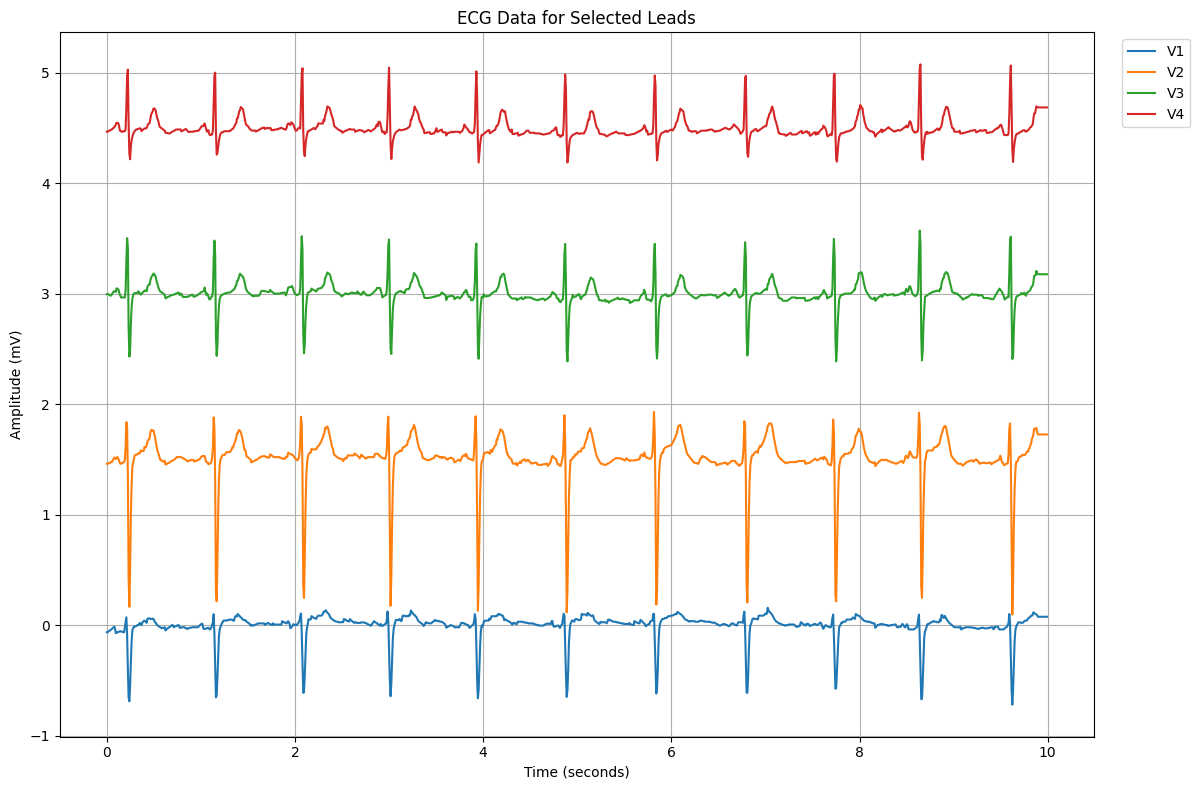

In [56]:
# Copied cell, to have 2nd plot option.
# Assuming 'data' is your 12x1250 numpy array from the .mat file
# Assuming 'leads' is your list of lead names in the correct order

leads_plot = ['V1', 'V2', 'V3', 'V4'] # Example list of leads to plot

# Get the indices of the leads to plot
indices_to_plot = [leads.index(lead) for lead in leads_plot]
print(indices_to_plot)

# Select the data for the chosen leads
data_to_plot = data[indices_to_plot, :]

# Create a time vector (assuming 125 Hz sampling frequency)
sampling_frequency = 125  # Hz
time = np.arange(data_to_plot.shape[1]) / sampling_frequency

# Plot the selected signals
plt.figure(figsize=(12, 8))

for i, index in enumerate(indices_to_plot):
    plt.plot(time, data_to_plot[i] + i * 1.5, label=leads[index]) # Offset for clarity

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Data for Selected Leads")
# legend location edit
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_V1_to_V4.png')
plt.show()

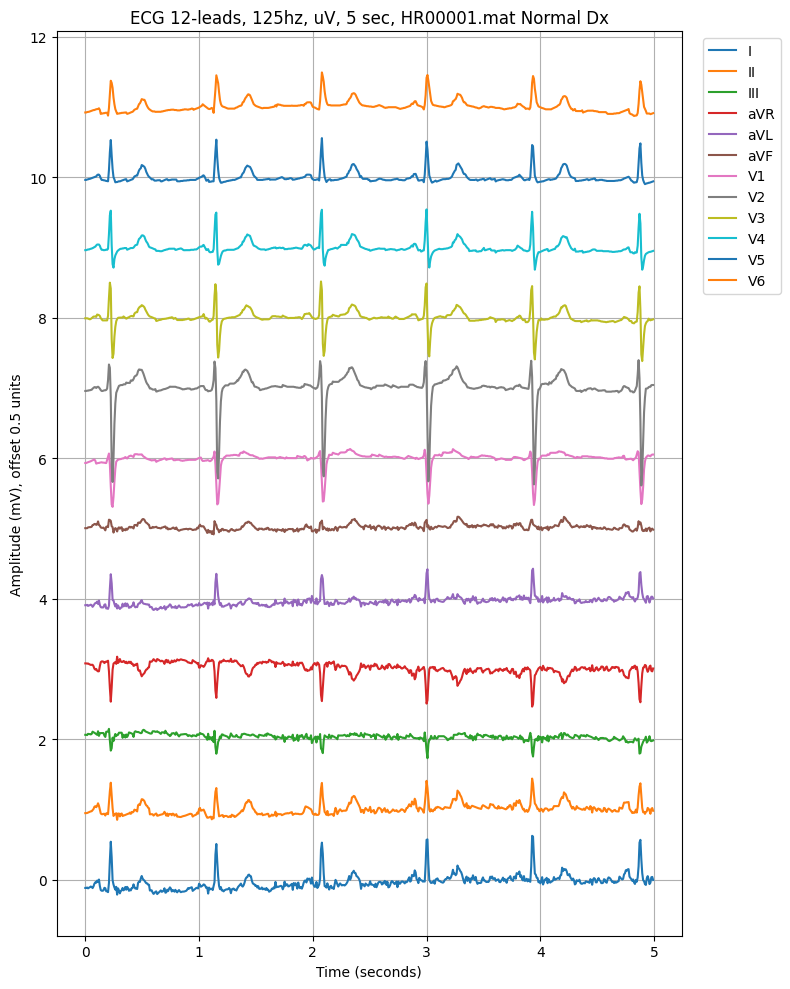

In [58]:
# Assuming 'data' is your 12x1250 numpy array and 'sampling_frequency' is 125 Hz

# Calculate the number of samples for 5 seconds
samples_to_plot = int(5 * sampling_frequency)

# Select the data for all 12 leads and the first 5 seconds
data_to_plot_all = data[:, :samples_to_plot]

# Create a time vector for the first 5 seconds
time_all = np.arange(samples_to_plot) / sampling_frequency

# Plot all 12 signals for the first 5 seconds
plt.figure(figsize=(8, 10)) # Increased height to 16, width remains 12

for i in range(data_to_plot_all.shape[0]):
    plt.plot(time_all, data_to_plot_all[i] + i * 1, label=leads[i]) # Offset for clarity, half unit shift up.

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV), offset 0.5 units")
plt.title("ECG 12-leads, 125hz, uV, 5 sec, HR00001.mat Normal Dx") # Added details to title
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1.0), fontsize='medium') # Increased font size and adjusted legend position
plt.grid(True)
plt.tight_layout()
plt.savefig('ECG_12lead_HR00001_Normal.png')
plt.show()

#### Notes: lead plots  
Group 1: Limb I, II, and Chest V5, V6  
  * peak is up, stron g amplitude  
Chest group 2: V1, V2, V3, V4, V5, V6  
  * peak down (V1, V2), middle (V3, V4), up (V5, V6)  
  * V3, V4 classic QRST pattern, both peak up and down.  
Derived group 3: III down small peak, aVR down, aVL up small peak, avF no peak wiggle.   
  * Derived limb leads (aVL, aVF) up      

## 2: Augmentation** Functions

### 2A. Chest Data Augmentations    

 * simple combination of pairs, Gemini  
 * angular movement, Claude, wait till later?


In [ ]:
# Copy Gemini code


def __init__(self, sampling_rate=500, lead_names=None):
    self.sampling_rate = sampling_rate
    if lead_names is None:
        self.lead_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
    else:
        self.lead_names = lead_names

    # Create a mapping from lead name to index for easy lookup
    self.lead_map = {name: i for i, name in enumerate(self.lead_names)}

def _get_lead(self, ecg, lead_name):
    """Helper to get a lead by name."""
    return ecg[self.lead_map[lead_name], :]

def _set_lead(self, ecg, lead_name, data):
    """Helper to set a lead by name."""
    ecg[self.lead_map[lead_name], :] = data

    def simulate_lead_displacement(self, ecg):
        """
        Simulates the physical displacement of ECG electrodes by mixing signals
        from adjacent leads. This is Stage 1 of the augmentation pipeline.

        Args:
            ecg (np.ndarray): A 12-lead ECG signal of shape (12, num_samples).

        Returns:
            np.ndarray: The ECG signal with simulated lead displacement.
        """
        displaced_ecg = ecg.copy()


        # --- 2. Precordial Leads Augmentation ---
        # V1 is mixed with V2
        alpha_v1 = np.random.uniform(0, 0.15)
        v1_aug = (1 - alpha_v1) * self._get_lead(ecg, 'V1') + alpha_v1 * self._get_lead(ecg, 'V2')
        self._set_lead(displaced_ecg, 'V1', v1_aug)

        # Leads V2 to V5 are mixed with their two neighbors
        for i in range(2, 6):
            lead_name = f'V{i}'
            prev_lead = f'V{i-1}'
            next_lead = f'V{i+1}'

            alpha = np.random.uniform(0, 0.15)
            beta = np.random.uniform(0, 0.15)
            # Ensure coefficients don't sum to > 1
            if alpha + beta > 1:
                # Simple scaling to keep it within bounds while preserving ratio
                total = alpha + beta
                alpha /= total
                beta /= total

            v_orig = self._get_lead(ecg, lead_name)
            v_prev = self._get_lead(ecg, prev_lead)
            v_next = self._get_lead(ecg, next_lead)

            v_aug = (1 - alpha - beta) * v_orig + alpha * v_prev + beta * v_next
            self._set_lead(displaced_ecg, lead_name, v_aug)

        # V6 is mixed with V5
        alpha_v6 = np.random.uniform(0, 0.15)
        v6_aug = (1 - alpha_v6) * self._get_lead(ecg, 'V6') + alpha_v6 * self._get_lead(ecg, 'V5')
        self._set_lead(displaced_ecg, 'V6', v6_aug)

        return displaced_ecg